In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r'data_dead_accident 3.csv')
print(data)

        DEAD_YEAR   Age      sex2   DeadDate   DateRec   TimeRec  \
0            2011  21.0     1:men   1/1/2011  1/1/2011   0:25:00   
1            2011  23.0     1:men   1/1/2011  1/1/2011   6:35:00   
2            2011  26.0     1:men   1/1/2011  1/1/2011  19:00:00   
3            2011  16.0     1:men   1/1/2011  1/1/2011   2:00:00   
4            2011  12.0     1:men   1/1/2011  1/1/2011   2:00:00   
...           ...   ...       ...        ...       ...       ...   
201374       2020  61.0  2:female   8/1/2020       NaN       NaN   
201375       2020  47.0  2:female   8/4/2020       NaN       NaN   
201376       2020  69.0  2:female  9/13/2020       NaN       NaN   
201377       2020  51.0  2:female  8/27/2020       NaN       NaN   
201378       2020  45.0     1:men  8/29/2020       NaN       NaN   

              Vehicle  men  female  nosex  
0        ไม่ทราบพาหนะ    1       0      0  
1       รถจักรยานยนต์    1       0      0  
2       รถจักรยานยนต์    1       0      0  
3      

In [3]:
data.info


<bound method DataFrame.info of         DEAD_YEAR   Age      sex2   DeadDate   DateRec   TimeRec  \
0            2011  21.0     1:men   1/1/2011  1/1/2011   0:25:00   
1            2011  23.0     1:men   1/1/2011  1/1/2011   6:35:00   
2            2011  26.0     1:men   1/1/2011  1/1/2011  19:00:00   
3            2011  16.0     1:men   1/1/2011  1/1/2011   2:00:00   
4            2011  12.0     1:men   1/1/2011  1/1/2011   2:00:00   
...           ...   ...       ...        ...       ...       ...   
201374       2020  61.0  2:female   8/1/2020       NaN       NaN   
201375       2020  47.0  2:female   8/4/2020       NaN       NaN   
201376       2020  69.0  2:female  9/13/2020       NaN       NaN   
201377       2020  51.0  2:female  8/27/2020       NaN       NaN   
201378       2020  45.0     1:men  8/29/2020       NaN       NaN   

              Vehicle  men  female  nosex  
0        ไม่ทราบพาหนะ    1       0      0  
1       รถจักรยานยนต์    1       0      0  
2       รถจักรยานยน

In [4]:
data.dtypes

DEAD_YEAR      int64
Age          float64
sex2          object
DeadDate      object
DateRec       object
TimeRec       object
Vehicle       object
men            int64
female         int64
nosex          int64
dtype: object

In [5]:
data.isnull().sum()

DEAD_YEAR         0
Age           28714
sex2              0
DeadDate          0
DateRec      105707
TimeRec      105707
Vehicle           0
men               0
female            0
nosex             0
dtype: int64

In [6]:
from datetime import datetime
con = data['DeadDate']
data['DeadDate']=pd.to_datetime(data['DeadDate'])
data.set_index('DeadDate', inplace=True)
data = data.resample('W').sum()


In [7]:
data

,DEAD_YEAR,Age,men,female,nosex
DeadDate,,,,,
2011-01-02,424321,4915.0,162,44,5
2011-01-09,888862,12088.0,361,72,9
2011-01-16,852664,10165.0,332,84,8
2011-01-23,902939,11381.0,374,63,12
2011-01-30,923049,11468.0,370,82,7
...,...,...,...,...,...
2020-09-06,676700,13806.0,266,69,0
2020-09-13,587820,11635.0,233,58,0
2020-09-20,634280,12961.0,236,78,0


In [8]:
data.index

DatetimeIndex(['2011-01-02', '2011-01-09', '2011-01-16', '2011-01-23',
               '2011-01-30', '2011-02-06', '2011-02-13', '2011-02-20',
               '2011-02-27', '2011-03-06',
               ...
               '2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23',
               '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20',
               '2020-09-27', '2020-10-04'],
              dtype='datetime64[ns]', name='DeadDate', length=510, freq='W-SUN')

In [9]:
m=data['men']
f=data['female']
x=data['nosex']

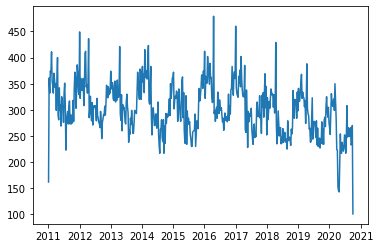

In [10]:
plt.plot(m)

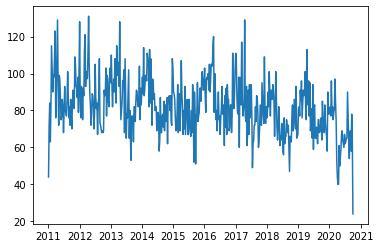

In [11]:
plt.plot(f)

In [12]:
######Time Series Filters
import matplotlib.pyplot as plt


import statsmodels.api as sm

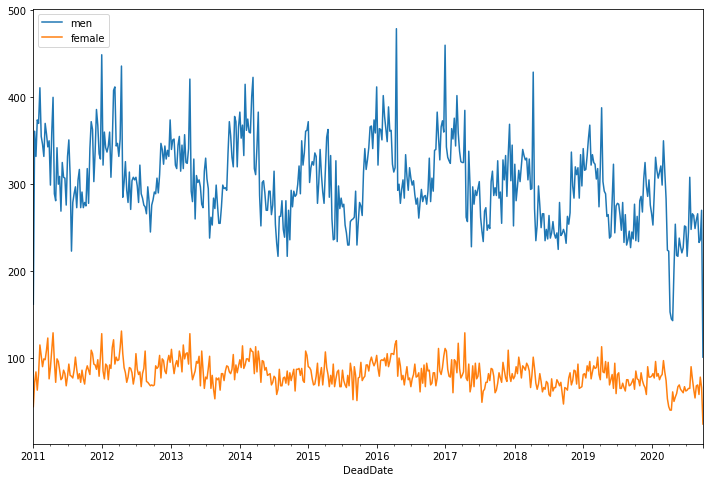

In [13]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
data.men.plot(ax=ax);
data.female.plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);

In [14]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(data.men)

In [15]:
gdp_decomp = data[['men']].copy()
gdp_decomp["cycle"] = gdp_cycle
gdp_decomp["trend"] = gdp_trend

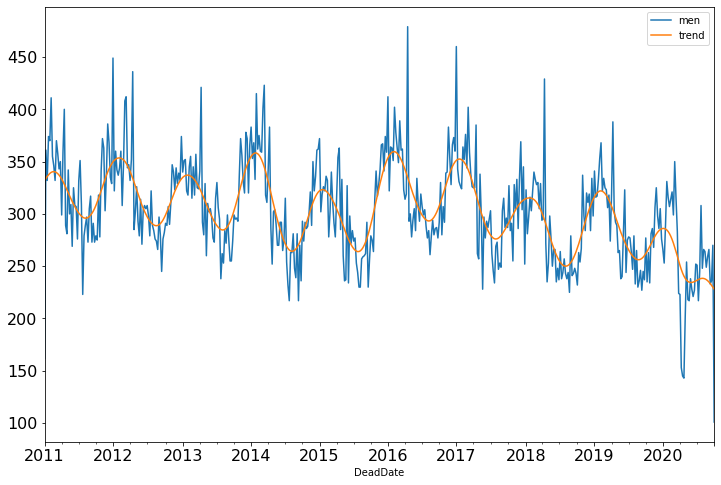

In [16]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
gdp_decomp[["men", "trend"]]["2000-03-31":].plot(ax=ax, fontsize=16);
legend = ax.get_legend()
legend.prop.set_size(20);

In [17]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(data.female)

In [18]:
gdp_decomp = data[['female']].copy()
gdp_decomp["cycle"] = gdp_cycle
gdp_decomp["trend"] = gdp_trend

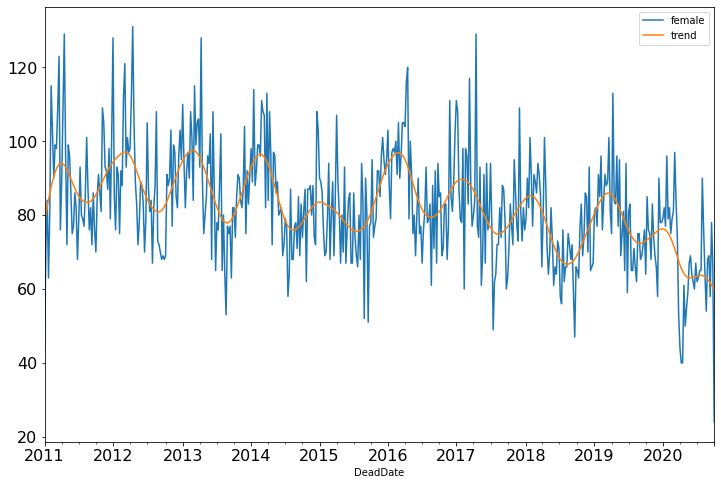

In [19]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
gdp_decomp[["female", "trend"]]["2000-03-31":].plot(ax=ax, fontsize=16);
legend = ax.get_legend()
legend.prop.set_size(20);

In [20]:
bk_cycles = sm.tsa.filters.bkfilter(data[["men","female"]])

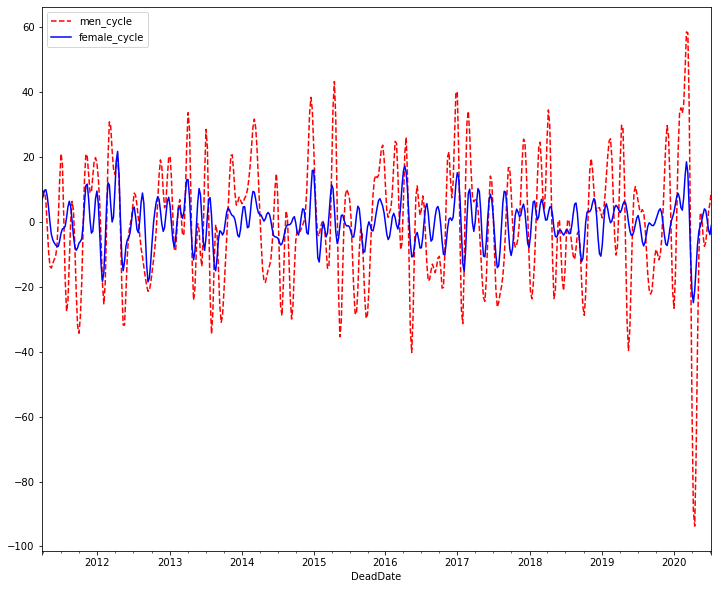

In [21]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
bk_cycles.plot(ax=ax, style=['r--', 'b-']);

In [22]:
##############
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [23]:
from statsmodels.graphics.api import qqplot

In [24]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [25]:
data = pd.read_csv(r'data_dead_accident 3.csv')
print(data)

        DEAD_YEAR   Age      sex2   DeadDate   DateRec   TimeRec  \
0            2011  21.0     1:men   1/1/2011  1/1/2011   0:25:00   
1            2011  23.0     1:men   1/1/2011  1/1/2011   6:35:00   
2            2011  26.0     1:men   1/1/2011  1/1/2011  19:00:00   
3            2011  16.0     1:men   1/1/2011  1/1/2011   2:00:00   
4            2011  12.0     1:men   1/1/2011  1/1/2011   2:00:00   
...           ...   ...       ...        ...       ...       ...   
201374       2020  61.0  2:female   8/1/2020       NaN       NaN   
201375       2020  47.0  2:female   8/4/2020       NaN       NaN   
201376       2020  69.0  2:female  9/13/2020       NaN       NaN   
201377       2020  51.0  2:female  8/27/2020       NaN       NaN   
201378       2020  45.0     1:men  8/29/2020       NaN       NaN   

              Vehicle  men  female  nosex  
0        ไม่ทราบพาหนะ    1       0      0  
1       รถจักรยานยนต์    1       0      0  
2       รถจักรยานยนต์    1       0      0  
3      

In [26]:
con = data['DeadDate']
data['DeadDate']=pd.to_datetime(data['DeadDate'])
data.set_index('DeadDate', inplace=True)
data = data.resample('W').sum()

In [27]:
del data['DEAD_YEAR']
del data['Age']

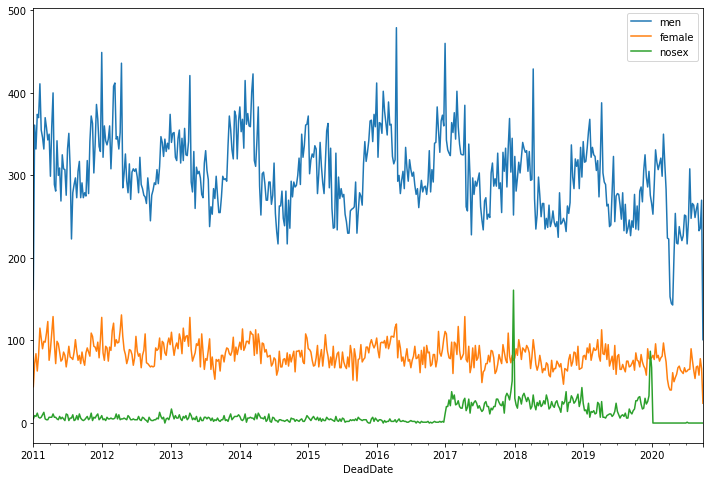

In [28]:
data.plot(figsize=(12,8));

ValueError: x is required to have ndim 1 but has ndim 2

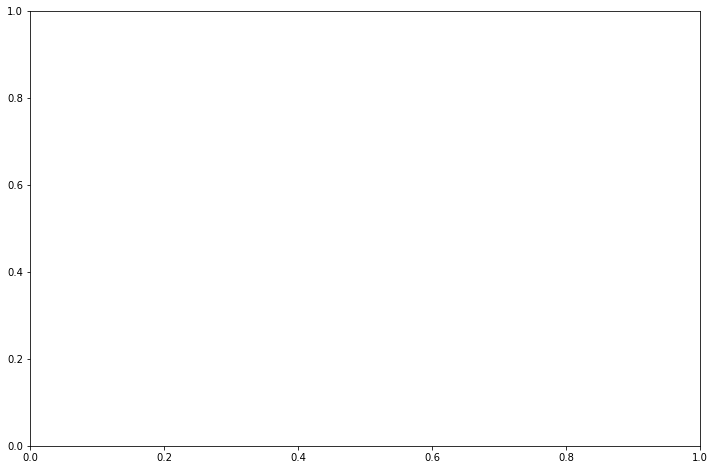

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
fig = sm.graphics.tsa.plot_acf(data.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data, lags=40, ax=ax2)

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
######
data = pd.read_csv(r'data_dead_accident 3.csv')
from datetime import datetime
con = data['DeadDate']
data['DeadDate']=pd.to_datetime(data['DeadDate'])
data.set_index('DeadDate', inplace=True)
data = data.resample('W').sum()


In [ ]:
m=data['men']
f=data['female']
x=data['nosex']

In [ ]:
m.head(20)

In [ ]:
from datetime import datetime

In [ ]:
m['2011']

In [ ]:
plt.plot(m)

In [ ]:
plt.plot(f)

In [ ]:
pip install rolling


In [ ]:
m_log = np.log(m)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
test_stationarity(m)

In [ ]:
m_log = np.log(m)
plt.plot(m_log)

In [ ]:
moving_avg = pd.rolling_mean(m_log,12)
plt.plot(m_log)
plt.plot(moving_avg, color='red')

In [ ]:
########
import math
import tensorflow

import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklratn.preprocessing import MinMaxScalar
from keras.models import sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
d = pd.read_csv(r'data_dead_accident 3.csv')